In [1]:
import warnings
warnings.filterwarnings('ignore')

In [200]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
Telecom_df=pd.read_csv("Telco_Customer_churn_Data.csv")
Telecom_df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [7]:
Telecom_df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [8]:
Telecom_df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [9]:
Telecom_df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [19]:
#Convert TotalCharges from object to float
Telecom_df['TotalCharges']=pd.to_numeric(Telecom_df['TotalCharges'],errors='coerce')
Telecom_df['TotalCharges'].dtype

dtype('float64')

In [41]:
#Find rows with zero tenure but non-zero charges
Zero_tenure_anomalies=Telecom_df[(Telecom_df['tenure']==0)&((Telecom_df['TotalCharges']>0) |(Telecom_df['MonthlyCharges']>0))]
Zero_tenure_anomalies

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [45]:
#Checking the duplicates which are there in the customerID
Telecom_df.duplicated(subset=['customerID'])

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Length: 7043, dtype: bool

In [52]:
#Total number of customers
total_customers = Telecom_df['customerID'].nunique()
total_customers

7043

In [53]:
#Customers who have churned vs not churned
churn_counts = Telecom_df['Churn'].value_counts()
churn_counts

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [58]:
#Average, minimum, and maximum of MonthlyCharges and TotalCharges
monthly_stats = Telecom_df['MonthlyCharges'].agg(['mean', 'min', 'max'])
monthly_stats

mean     64.761692
min      18.250000
max     118.750000
Name: MonthlyCharges, dtype: float64

In [63]:
total_stats = Telecom_df['TotalCharges'].agg(['mean', 'min', 'max'])
total_stats

mean    2283.300441
min       18.800000
max     8684.800000
Name: TotalCharges, dtype: float64

In [68]:
#Number of senior citizens
senior_citizen_count = Telecom_df[Telecom_df['SeniorCitizen'] == 1].shape[0]
senior_citizen_count

1142

In [73]:
#Churn rate by gender
churn_by_gender = Telecom_df.groupby('gender')['Churn'].value_counts(normalize=True).unstack()
churn_by_gender

Churn,No,Yes
gender,,
Female,0.730791,0.269209
Male,0.738397,0.261603


In [74]:
# Churn rate: senior citizens vs non-senior citizens
churn_by_senior = Telecom_df.groupby('SeniorCitizen')['Churn'].value_counts(normalize=True).unstack()
churn_by_senior

Churn,No,Yes
SeniorCitizen,,
0,0.763938,0.236062
1,0.583187,0.416813


In [75]:
#Customers with partners or dependents, and their churn rates
#Total number of customers with partners
partner_counts = Telecom_df['Partner'].value_counts()
partner_counts

Partner
No     3641
Yes    3402
Name: count, dtype: int64

In [82]:
#Total number of customers with dependents
dependents_counts = Telecom_df['Dependents'].value_counts()
dependents_counts

Dependents
No     4933
Yes    2110
Name: count, dtype: int64

In [87]:
#Churn rate by partner status
churn_by_partner = Telecom_df.groupby('Partner')['Churn'].value_counts(normalize=True).unstack()
churn_by_partner

Churn,No,Yes
Partner,,
No,0.670420,0.329580
Yes,0.803351,0.196649


In [93]:
#Churn rate by dependents status
churn_by_dependents = Telecom_df.groupby('Dependents')['Churn'].value_counts(normalize=True).unstack()
churn_by_dependents

Churn,No,Yes
Dependents,,
No,0.687209,0.312791
Yes,0.845498,0.154502


In [100]:
# Count of customers by InternetService type
internet_service_counts = Telecom_df['InternetService'].value_counts()
internet_service_counts

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

In [104]:
# Number of customers with OnlineSecurity, TechSupport, or StreamingTV
online_security_yes = Telecom_df[Telecom_df['OnlineSecurity'] == 'Yes'].shape[0]
online_security_yes

2019

In [109]:
# Churn rate by OnlineSecurity
churn_online_security = Telecom_df.groupby('OnlineSecurity')['Churn'].value_counts(normalize=True).unstack()
churn_online_security

Churn,No,Yes
OnlineSecurity,,
No,0.582333,0.417667
No internet service,0.925950,0.074050
Yes,0.853888,0.146112


In [114]:
# Churn rate by OnlineBackup
churn_online_backup = Telecom_df.groupby('OnlineBackup')['Churn'].value_counts(normalize=True).unstack()
churn_online_backup

Churn,No,Yes
OnlineBackup,,
No,0.600712,0.399288
No internet service,0.925950,0.074050
Yes,0.784685,0.215315


In [120]:
# Churn rate by DeviceProtection
churn_device_protection = Telecom_df.groupby('DeviceProtection')['Churn'].value_counts(normalize=True).unstack()
churn_device_protection

Churn,No,Yes
DeviceProtection,,
No,0.608724,0.391276
No internet service,0.925950,0.074050
Yes,0.774979,0.225021


In [125]:
# Churn rate by TechSupport
churn_tech_support = Telecom_df.groupby('TechSupport')['Churn'].value_counts(normalize=True).unstack()
churn_tech_support

Churn,No,Yes
TechSupport,,
No,0.583645,0.416355
No internet service,0.925950,0.074050
Yes,0.848337,0.151663


In [129]:
# Churn rate by StreamingTV
churn_streaming_tv = Telecom_df.groupby('StreamingTV')['Churn'].value_counts(normalize=True).unstack()
churn_streaming_tv

Churn,No,Yes
StreamingTV,,
No,0.664769,0.335231
No internet service,0.925950,0.074050
Yes,0.699298,0.300702


In [131]:
# Churn rate by StreamingMovies
churn_streaming_movies = Telecom_df.groupby('StreamingMovies')['Churn'].value_counts(normalize=True).unstack()
churn_streaming_movies

Churn,No,Yes
StreamingMovies,,
No,0.663196,0.336804
No internet service,0.925950,0.074050
Yes,0.700586,0.299414


In [136]:
#How many customers have each Contract type?
contract_counts = Telecom_df['Contract'].value_counts()
contract_counts

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

In [139]:
#Churn rate by Contract type
churn_by_contract = Telecom_df.groupby('Contract')['Churn'].value_counts(normalize=True).unstack()
churn_by_contract

Churn,No,Yes
Contract,,
Month-to-month,0.572903,0.427097
One year,0.887305,0.112695
Two year,0.971681,0.028319


In [144]:
#Common PaymentMethods and their churn rates
payment_counts = Telecom_df['PaymentMethod'].value_counts()
payment_counts

PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64

In [150]:
churn_by_payment = Telecom_df.groupby('PaymentMethod')['Churn'].value_counts(normalize=True).unstack()
churn_by_payment

Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),0.832902,0.167098
Credit card (automatic),0.847569,0.152431
Electronic check,0.547146,0.452854
Mailed check,0.808933,0.191067


In [154]:
#Does PaperlessBilling affect churn?
churn_by_paperless = Telecom_df.groupby('PaperlessBilling')['Churn'].value_counts(normalize=True).unstack()
churn_by_paperless

Churn,No,Yes
PaperlessBilling,,
No,0.836699,0.163301
Yes,0.664349,0.335651


In [158]:
#Average MonthlyCharges and TotalCharges for churned vs non-churned customers
avg_charges_by_churn = Telecom_df.groupby('Churn')[['MonthlyCharges', 'TotalCharges']].mean()
avg_charges_by_churn

,MonthlyCharges,TotalCharges
Churn,,
No,61.265124,2555.344141
Yes,74.441332,1531.796094


In [162]:
#Which group contributes more to total revenue?
total_revenue_by_churn = Telecom_df.groupby('Churn')['TotalCharges'].sum()
total_revenue_by_churn

Churn
No     13193241.8
Yes     2862926.9
Name: TotalCharges, dtype: float64

In [165]:
#Distribution of charges among different Contract types
# Average charges by contract
avg_charges_by_contract = Telecom_df.groupby('Contract')[['MonthlyCharges', 'TotalCharges']].mean()
avg_charges_by_contract

,MonthlyCharges,TotalCharges
Contract,,
Month-to-month,66.398490,1369.254581
One year,65.048608,3034.683084
Two year,60.770413,3728.933947


In [269]:
charge_distribution = Telecom_df[['Contract', 'MonthlyCharges', 'TotalCharges']]
charge_distribution

,Contract,MonthlyCharges,TotalCharges
0,Month-to-month,29.85,29.85
1,One year,56.95,1889.50
2,Month-to-month,53.85,108.15
3,One year,42.30,1840.75
4,Month-to-month,70.70,151.65
...,...,...,...
7038,One year,84.80,1990.50
7039,One year,103.20,7362.90
7040,Month-to-month,29.60,346.45
7041,Month-to-month,74.40,306.60


In [168]:
# What is the distribution of customer tenure
tenure_distribution = Telecom_df['tenure'].value_counts().sort_index()
tenure_distribution

tenure
0      11
1     613
2     238
3     200
4     176
     ... 
68    100
69     95
70    119
71    170
72    362
Name: count, Length: 73, dtype: int64

In [170]:
#How does tenure affect the likelihood of churn?
churn_rate_by_tenure = Telecom_df.groupby('tenure')['Churn'].value_counts(normalize=True).unstack()
churn_rate_by_tenure

Churn,No,Yes
tenure,,
0,1.000000,NaN
1,0.380098,0.619902
2,0.483193,0.516807
3,0.530000,0.470000
4,0.528409,0.471591
...,...,...
68,0.910000,0.090000
69,0.915789,0.084211
70,0.907563,0.092437


In [177]:
#What’s the average tenure for churned vs non-churned customers
avg_tenure_by_churn = Telecom_df.groupby('Churn')['tenure'].mean()
avg_tenure_by_churn

Churn
No     37.569965
Yes    17.979133
Name: tenure, dtype: float64

In [184]:
# List of add-on service columns
add_on_services = ['OnlineSecurity', 'TechSupport', 'StreamingTV', 'OnlineBackup', 'DeviceProtection', 'StreamingMovies']
# here i am Creating an new column that counts how many add-on services each customer has as "Yes"
Telecom_df['AddOnServiceCount'] = Telecom_df[add_on_services].apply(lambda row: sum(row == 'Yes'), axis=1)
churn_by_service_count = Telecom_df.groupby('AddOnServiceCount')['Churn'].value_counts(normalize=True).unstack()
churn_by_service_count

Churn,No,Yes
AddOnServiceCount,,
0,0.785940,0.214060
1,0.542443,0.457557
2,0.641820,0.358180
3,0.726297,0.273703
4,0.776995,0.223005
5,0.875657,0.124343
6,0.947183,0.052817


In [191]:
#Do people with both Partner = Yes and Dependents = Yes churn less than others?
Telecom_df['Partner_Dependent'] = Telecom_df['Partner'] + '_' + Telecom_df['Dependents']
churn_by_family = Telecom_df.groupby('Partner_Dependent')['Churn'].value_counts(normalize=True).unstack()
churn_by_family

Churn,No,Yes
Partner_Dependent,,
No_No,0.657622,0.342378
No_Yes,0.786704,0.213296
Yes_No,0.745917,0.254083
Yes_Yes,0.857633,0.142367


In [195]:
# Is there a strong correlation between MonthlyCharges, TotalCharges, and Churn?
# Convert churn to binary (No = 0, Yes = 1)
Telecom_df['Churn_numeric'] = Telecom_df['Churn'].map({'No': 0, 'Yes': 1})

In [199]:
# Compute correlation matrix
correlation_matrix = Telecom_df[['MonthlyCharges', 'TotalCharges', 'Churn_numeric']].corr()
correlation_matrix

,MonthlyCharges,TotalCharges,Churn_numeric
MonthlyCharges,1.000000,0.651065,0.193356
TotalCharges,0.651065,1.000000,-0.199484
Churn_numeric,0.193356,-0.199484,1.000000


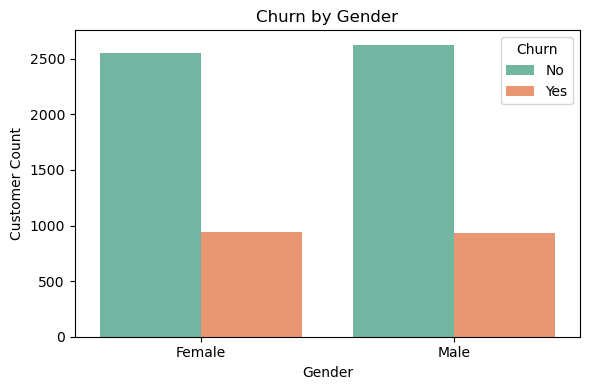

In [206]:
# Countplot Churn by Gender
plt.figure(figsize=(6, 4))
sns.countplot(data=Telecom_df, x='gender', hue='Churn', palette='Set2')
plt.title('Churn by Gender')
plt.xlabel('Gender')
plt.ylabel('Customer Count')
plt.legend(title='Churn')
plt.tight_layout()
plt.show()

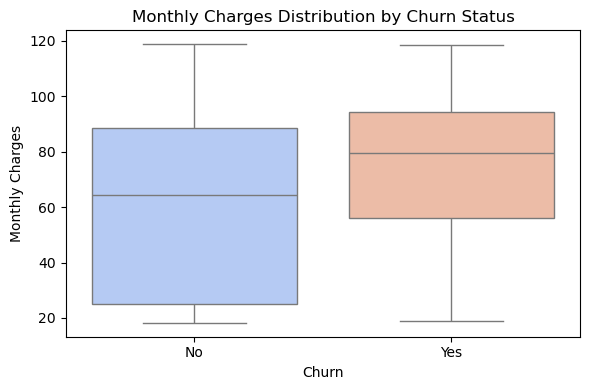

In [215]:
#Boxplot MonthlyCharges vs Churn
plt.figure(figsize=(6, 4))
sns.boxplot(data=Telecom_df, x='Churn', y='MonthlyCharges', palette='coolwarm')
plt.title('Monthly Charges Distribution by Churn Status')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.tight_layout()
plt.show()

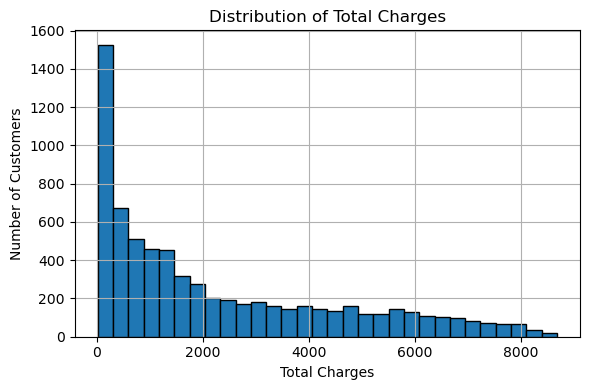

In [221]:
#Histogram of TotalCharges
plt.figure(figsize=(6, 4))
Telecom_df['TotalCharges'].dropna().hist(bins=30, edgecolor='black')
plt.title('Distribution of Total Charges')
plt.xlabel('Total Charges')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()

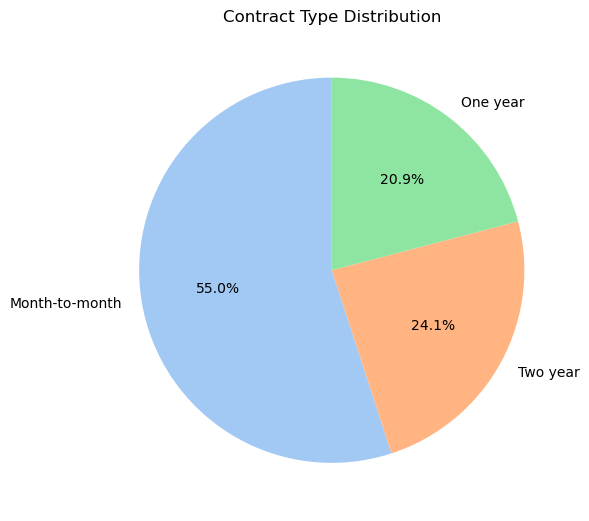

In [227]:
#Pie Chart of Contract Distribution
contract_counts = Telecom_df['Contract'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(contract_counts, labels=contract_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Contract Type Distribution')
plt.tight_layout()
plt.show()

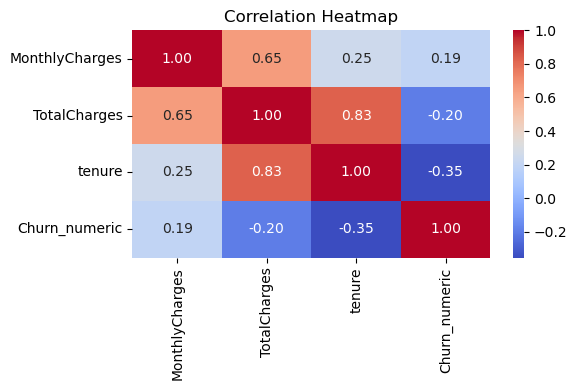

In [238]:
#Heatmap of Correlation Between Numeric Fields
Telecom_df['Churn_numeric'] = Telecom_df['Churn'].map({'No': 0, 'Yes': 1})
corr_data = Telecom_df[['MonthlyCharges', 'TotalCharges', 'tenure', 'Churn_numeric']].dropna()
plt.figure(figsize=(6, 4))
sns.heatmap(corr_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

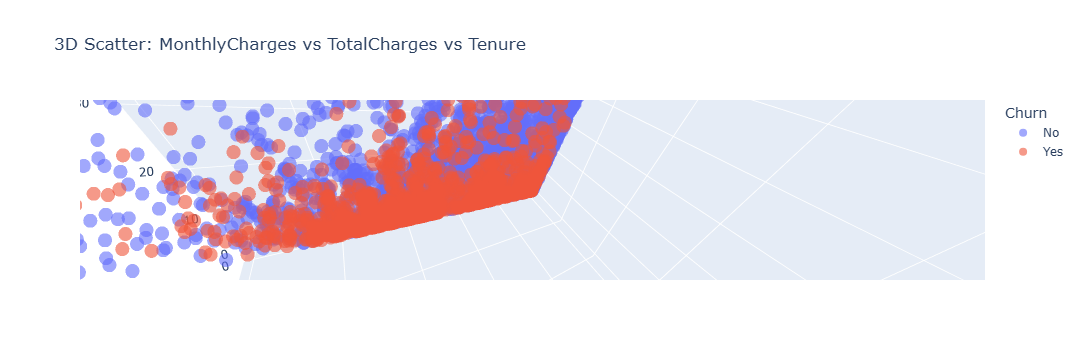

In [245]:
#Compare MonthlyCharges, TotalCharges, and tenure, colored by churn:
import plotly.express as px

fig = px.scatter_3d(
    Telecom_df,
    x='MonthlyCharges',
    y='TotalCharges',
    z='tenure',
    color='Churn',
    title='3D Scatter: MonthlyCharges vs TotalCharges vs Tenure',
    opacity=0.6
)
fig.show()

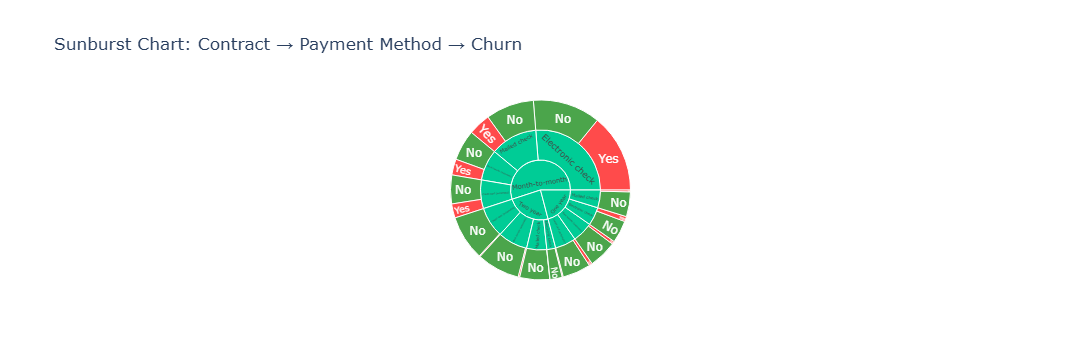

In [255]:
#visualizing to See how churn is distributed across contract & payment layers
fig = px.sunburst(
    Telecom_df,
    path=['Contract', 'PaymentMethod', 'Churn'],
    values=None,  # counts automatically
    color='Churn',
    color_discrete_map={'Yes': 'red', 'No': 'green'},
    title='Sunburst Chart: Contract → Payment Method → Churn'
)
fig.show()

In [272]:
Telecom_df.to_csv('Telecommunication_data.csv',index=False)